In [14]:
import numpy as np
import scipy.ndimage as nd
import imageio.v2 as iio
import matplotlib.pylab as plt
from scipy.ndimage import map_coordinates


(1427, 2100, 3)


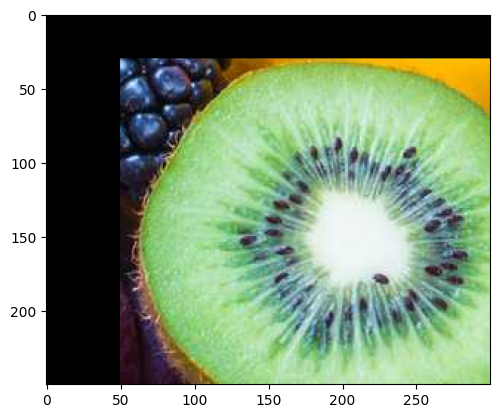

In [16]:
data = iio.imread('fruit.jpg')
bmg = data[500:750,220:520]
print(data.shape)
bdata = nd.shift(bmg,(30,50,0))

iio.imsave('kiwi.jpg',bmg)
plt.imshow(bdata)
plt.show()

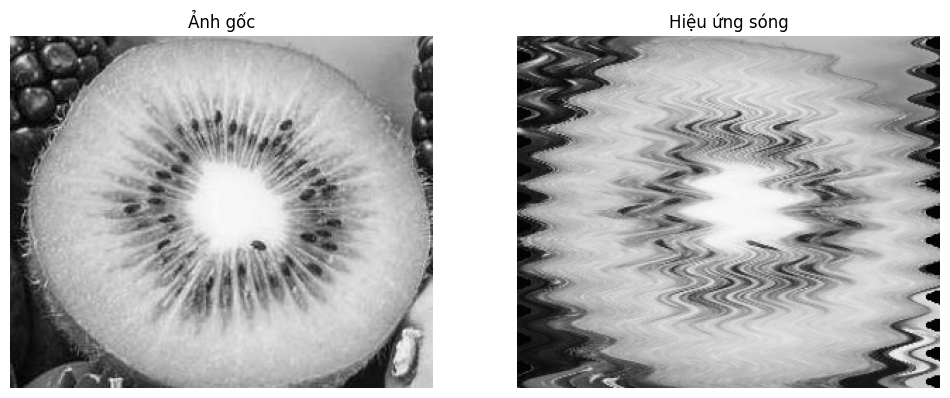

In [19]:
image = iio.imread('kiwi.jpg', pilmode='F')  # Đọc ảnh grayscale
H, W = image.shape

# Tạo lưới tọa độ gốc
x, y = np.meshgrid(np.arange(W), np.arange(H))

# Áp dụng hiệu ứng sóng theo trục x
# Điều chỉnh tần số (frequency) và biên độ (amplitude) theo ý bạn
amplitude = 10
frequency = 0.05
x_wave = x + amplitude * np.sin(2 * np.pi * frequency * y)

# Đóng gói lại các tọa độ để map_coordinates sử dụng (dạng 2D: [2, H, W])
coords = np.array([y, x_wave])

# Lấy giá trị ảnh mới bằng nội suy tại tọa độ đã bị biến đổi
warped = map_coordinates(image, coords)

# Hiển thị kết quả
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.title('Ảnh gốc')
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Hiệu ứng sóng')
plt.imshow(warped, cmap='gray')
plt.axis('off')
plt.imsave('kiwi_wave.jpg',warped)
plt.show()